 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [133]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
# I use this to determine that i'm working off of the right directory
print(Path.cwd())
#import the plotting tool
%matplotlib inline

c:\Users\15613\FinTechWork\Unit4-Homework


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [134]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv", )
whale_df = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [135]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [136]:
# Drop nulls
whale_df = whale_df.dropna()
#checks to make sure the nulls were dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [137]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_path,index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending=True)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [138]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [139]:
# Drop nulls
algo_df = algo_df.dropna()
#checks to make sure the nulls were dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [140]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [141]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [142]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','').astype(dtype='float64',copy=False)
sp500_df


C:\Users\15613\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [143]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [144]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
# verifies nulls have been dropped
sp500_returns.isnull().sum()


Close    0
dtype: int64

In [145]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close':'SP500'}, inplace=True)
sp500_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [146]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
combined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

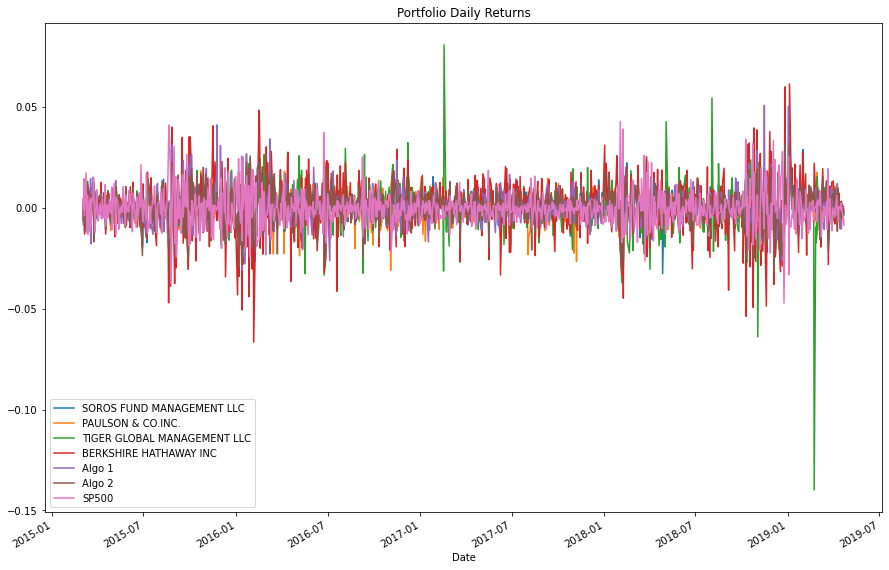

In [147]:
# Plot daily returns of all portfolios
combined_portfolio.plot(figsize=[15,10], legend=True, title="Portfolio Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='Date'>

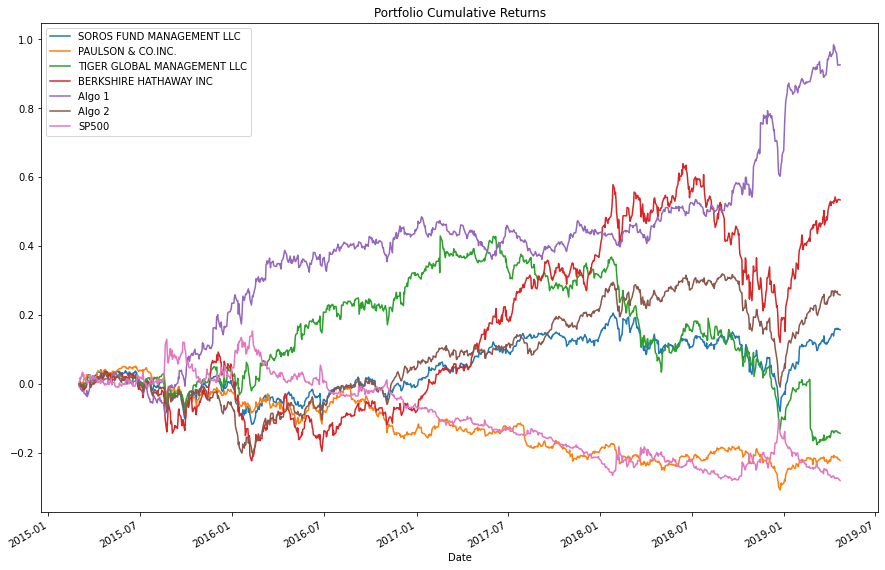

In [148]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolio).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=[15,10], legend=True, title="Portfolio Cumulative Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

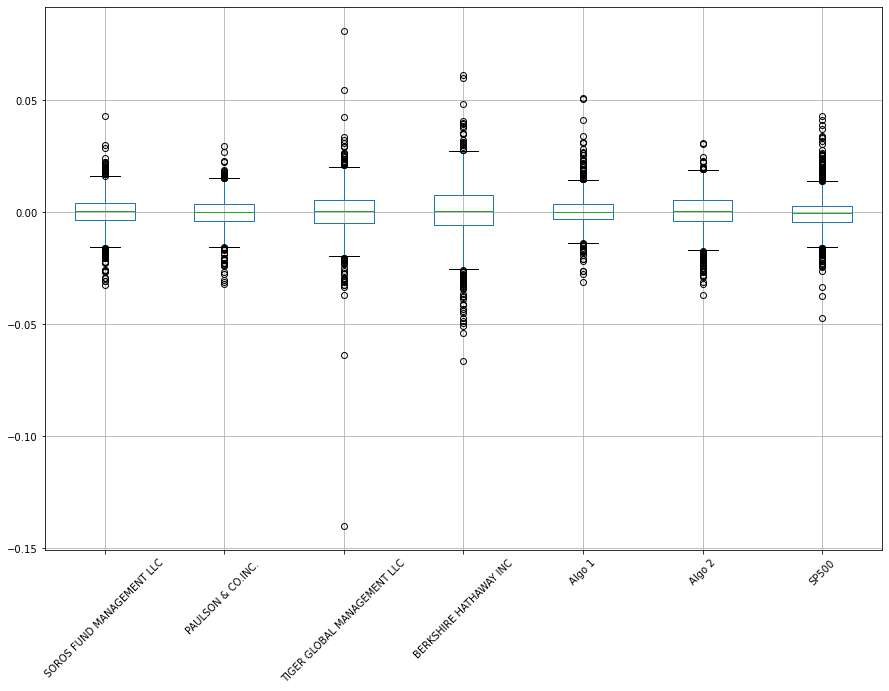

In [149]:
# Box plot to visually show risk
combined_portfolio.boxplot(figsize=[15,10],rot=45, fontsize=10)

### Calculate Standard Deviations

In [150]:
# Calculate the daily standard deviations of all portfolios
combined_portfolio_daily_std = combined_portfolio.std()
combined_portfolio_daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [151]:
# Calculate  the daily standard deviation of S&P 500
SP500_daily_std = combined_portfolio['SP500'].std()
SP500_daily_std
# Determine which portfolios are riskier than the S&P 500
risky_portfolio = [combined_portfolio_daily_std > SP500_daily_std]
risky_portfolio



[SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                         False
 Algo 2                         False
 SP500                          False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [152]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_portfolio_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

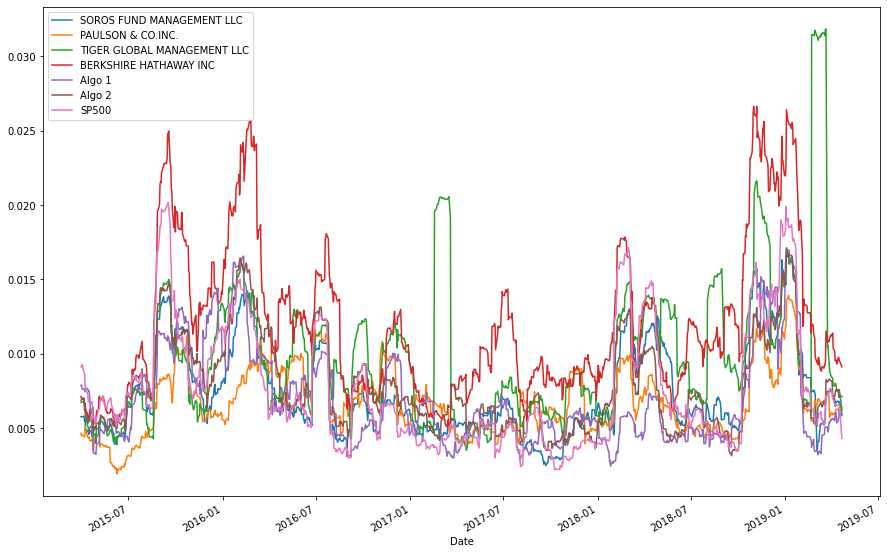

In [153]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling21daystd = combined_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
rolling21daystd.plot(figsize=[15,10],legend=True)

### Calculate and plot the correlation

<AxesSubplot:>

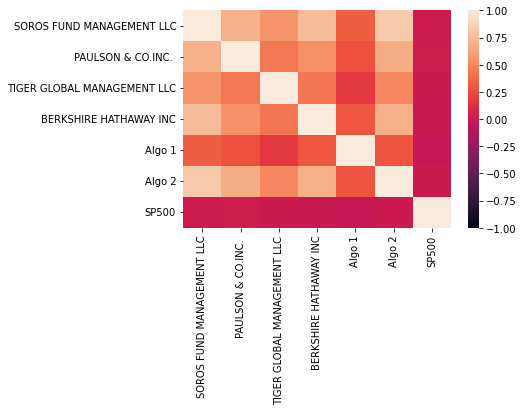

In [154]:
# Calculate the correlation
correlation = combined_portfolio.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Berkshire vs SP500'}, xlabel='Date'>

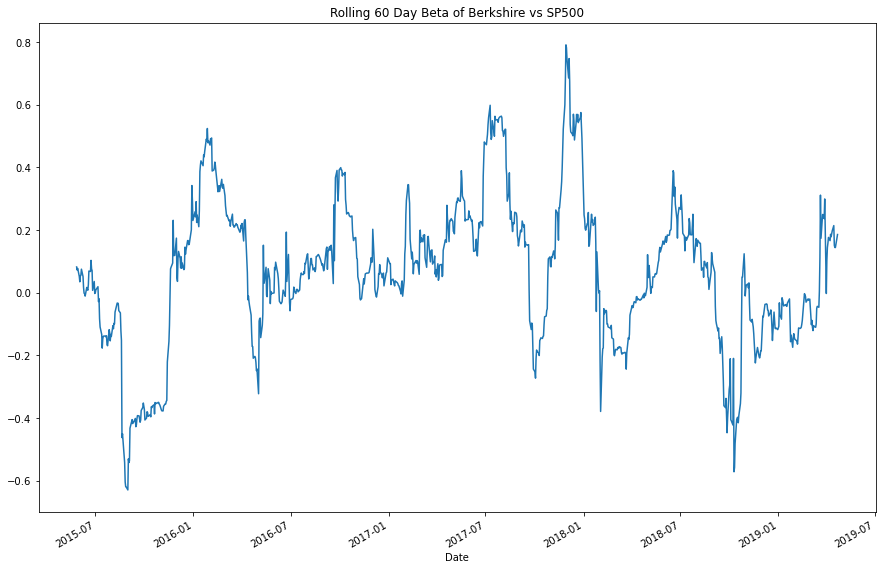

In [155]:
# Calculate rolling 60-day rolling covariance of a single portfolio
berkshire_cov60D = combined_portfolio['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_portfolio['SP500'])
berkshire_cov60D
# Calculate 60-day rolling variance of S&P 500
SPvar60D = combined_portfolio['SP500'].rolling(window=60).var()
# Computing beta
berkshire_beta60D = berkshire_cov60D / SPvar60D
# Plot beta trend
berkshire_beta60D.plot(figsize=[15,10], title="Rolling 60 Day Beta of Berkshire vs SP500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM Rolling 21 Day Beta of Berkshire vs SP500'}, xlabel='Date'>

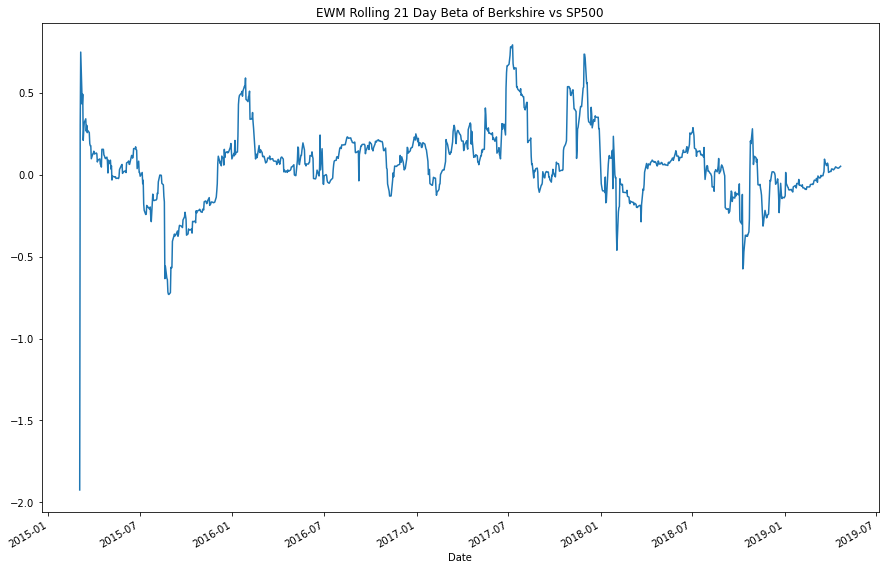

In [156]:
# Use `ewm` to calculate the rolling window
berkshire_cov21D = combined_portfolio['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).cov(combined_portfolio['SP500'])
berkshire_cov21D
# Using 'ewm' to calculate 21-day rolling variance of S&P 500
SPvar21D = combined_portfolio['SP500'].ewm(halflife=21).var()
# Use 'ewm' to Compute 21 day rolling beta
berkshire_beta21D = berkshire_cov21D / SPvar21D
# Plot 'ewm' 21 day beta trend
berkshire_beta21D.plot(figsize=[15,10], title="EWM Rolling 21 Day Beta of Berkshire vs SP500")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [157]:
# Annualized Sharpe Ratios
#ann_sharpe_ratio = ((combined_portfolio.mean()-combined_portfolio['SP500'].mean()) * 252) / (combined_portfolio.std() * np.sqrt(252))
ann_sharpe_ratio = ((combined_portfolio.mean()-0) * 252) / (combined_portfolio.std() * np.sqrt(252))
ann_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:>

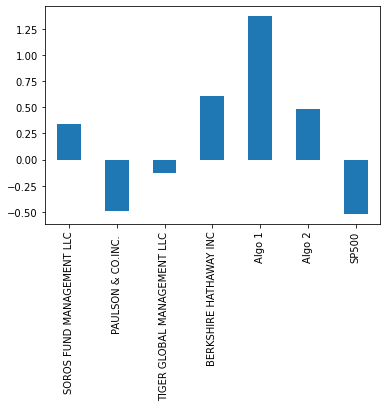

In [158]:
# Visualize the sharpe ratios as a bar plot
ann_sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

As you can see from the above, the combined algo portfolios have a sharpe ratio of 1.853923 compared to the combine sharpe ratios of the whale portfolio at 0.328029 and the SP500 sharpe ratio of -0.518582...therefore the Algo portfolios have a better performance with respect to the mkt risk.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [159]:
# Reading data from 1st stock
# Read in the data, formated the date field as date and named it as index
XOM_returns_path = Path("./Resources/XOM_historical.csv", )
XOM_df = pd.read_csv(XOM_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
# Renamed the Close column to be the symbol XOM
XOM_df.rename(columns={'Close':'XOM'}, inplace=True)
# Dropped the Symbol Column and sorted the data in ascending order
XOM_df = XOM_df.drop(columns=['Symbol'], axis=1)
XOM_df.sort_index(ascending=True)
XOM_df.head()

,XOM
Date,
2012-10-01,91.80
2012-10-02,91.72
2012-10-03,91.70
2012-10-04,92.22
2012-10-05,92.55


In [160]:
# Reading data from 2nd stock
# Read in the data, formated the date field as date and named it as index
JPM_returns_path = Path("./Resources/JPM_historical.csv", )
JPM_df = pd.read_csv(JPM_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
# Renamed the Close column to be the symbol JPM
JPM_df.rename(columns={'Close':'JPM'}, inplace=True)
# Dropped the Symbol Column and sorted the data in ascending order
JPM_df = JPM_df.drop(columns=['Symbol'], axis=1)
JPM_df.sort_index(ascending=True)
JPM_df.head()

,JPM
Date,
2012-10-01,40.97
2012-10-02,40.92
2012-10-03,40.86
2012-10-04,41.82
2012-10-05,41.71


In [161]:
# Reading data from 3rd stock
AMZN_returns_path = Path("./Resources/AMZN_historical.csv", )
AMZN_df = pd.read_csv(AMZN_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
# Renamed the Close column to be the symbol JPM
AMZN_df.rename(columns={'Close':'AMZN'}, inplace=True)
# Dropped the Symbol Column and sorted the data in ascending order
AMZN_df = AMZN_df.drop(columns=['Symbol'], axis=1)
AMZN_df.sort_index(ascending=True)
AMZN_df.head()

,AMZN
Date,
2012-10-01,252.01
2012-10-02,250.60
2012-10-03,255.92
2012-10-04,260.47
2012-10-05,258.51


In [162]:
# Combine all stocks in a single DataFrame
user_portfolio = pd.concat([XOM_df, JPM_df, AMZN_df], axis='columns', join='inner')
user_portfolio.head()

,XOM,JPM,AMZN
Date,,,
2012-10-01,91.80,40.97,252.01
2012-10-02,91.72,40.92,250.60
2012-10-03,91.70,40.86,255.92
2012-10-04,92.22,41.82,260.47
2012-10-05,92.55,41.71,258.51


In [163]:
# Reset Date index
# already executed in the above code before i got to this line -Sam

In [164]:
# Reorganize portfolio data by having a column per symbol
# already executed in the above code before i got to this line -Sam

In [165]:
# Calculate daily returns
user_daily_returns = user_portfolio.pct_change().dropna()
# Drop NAs

# Display sample data
user_daily_returns.head()

,XOM,JPM,AMZN
Date,,,
2012-10-02,-0.000871,-0.001220,-0.005595
2012-10-03,-0.000218,-0.001466,0.021229
2012-10-04,0.005671,0.023495,0.017779
2012-10-05,0.003578,-0.002630,-0.007525
2012-10-08,0.001405,-0.001199,0.002128


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [166]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
user_wtd_returns = user_daily_returns.dot(weights)

# Display sample data
user_wtd_returns.head()

Date
2012-10-02   -0.002562
2012-10-03    0.006515
2012-10-04    0.015648
2012-10-05   -0.002192
2012-10-08    0.000778
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [167]:
# Join your returns DataFrame to the original returns DataFrame
total_portfolio = pd.concat([user_wtd_returns, combined_portfolio], axis='columns', join='inner')
total_portfolio.rename(columns={0:"Sam"}, inplace=True)
total_portfolio.head()

,Sam,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2015-03-03,-0.001418,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,-0.002451,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.002071,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.016886,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000168,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [168]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio.dropna()
total_portfolio.isnull().sum()

Sam                            0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [169]:
# Calculate the annualized `std`
total_portfolio_std = total_portfolio.std()
annualized_std_total = total_portfolio_std * np.sqrt(252)
annualized_std_total

Sam                            0.179530
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

### Calculate and plot rolling `std` with 21-day window

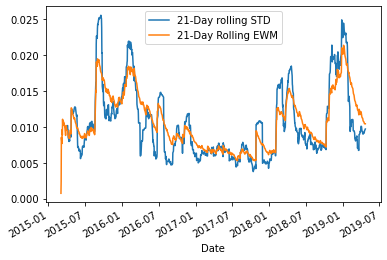

In [170]:
# Calculate rolling standard deviation
rolling21daystd_sam = total_portfolio['Sam'].rolling(window=21).std()
rolling21daystd_sam_ewm = total_portfolio['Sam'].ewm(halflife=21).std()
# Plot rolling standard deviation
ax = rolling21daystd_sam.plot()
rolling21daystd_sam_ewm.plot(ax=ax)
ax.legend(['21-Day rolling STD','21-Day Rolling EWM'])

### Calculate and plot the correlation

<AxesSubplot:>

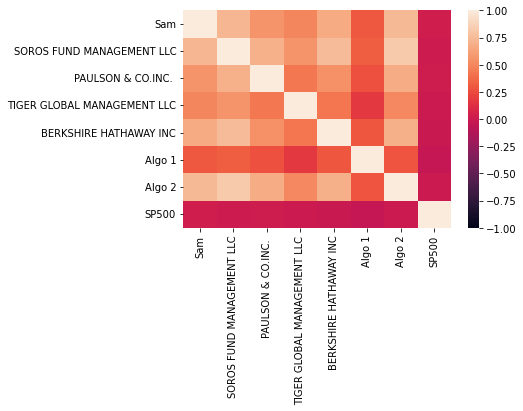

In [171]:
# Calculate and plot the correlation
correlation_total = total_portfolio.corr()
# Display de correlation matrix
sns.heatmap(correlation_total, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

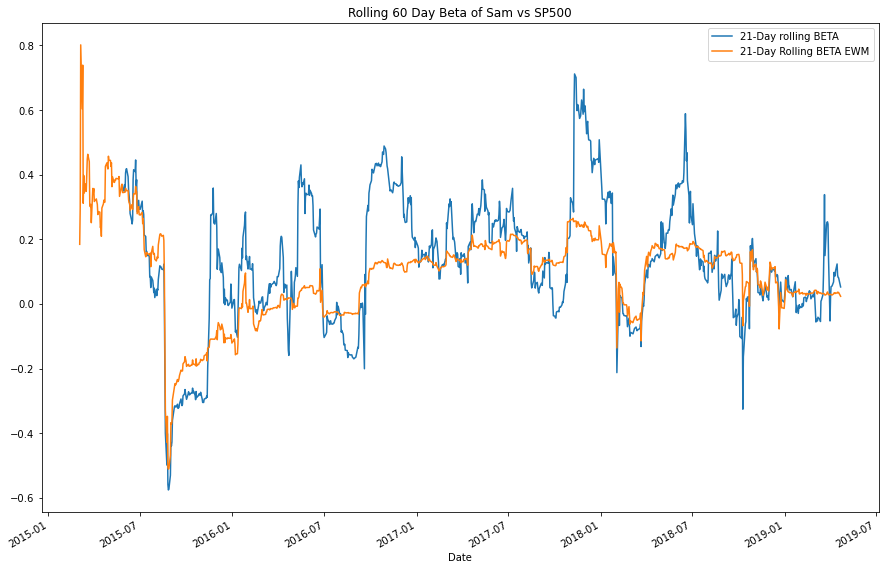

In [179]:
# Calculate and plot Beta
sam_cov60D = total_portfolio['Sam'].rolling(window=60).cov(total_portfolio['SP500'])
sam_cov60D_ewm = total_portfolio['Sam'].ewm(halflife=60).cov(total_portfolio['SP500'])
# Calculate 60-day rolling variance of S&P 500
Total_SPvar60D = total_portfolio['SP500'].rolling(window=60).var()
Total_SPvar60D_ewm = total_portfolio['SP500'].ewm(halflife=60).var()
# Computing beta
sam_beta60D = sam_cov60D / Total_SPvar60D
sam_beta60D_ewm = sam_cov60D_ewm / Total_SPvar60D_ewm
# Plot beta trend
ax = sam_beta60D.plot(figsize=[15,10], title="Rolling 60 Day Beta of Sam vs SP500")
sam_beta60D_ewm.plot(ax=ax)
ax.legend(['21-Day rolling BETA','21-Day Rolling BETA EWM'])
#sam_beta60D.plot(figsize=[15,10], title="Rolling 60 Day Beta of Sam vs SP500")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [176]:
# Calculate Annualized Sharpe Ratios
total_ann_sharpe_ratio = ((total_portfolio.mean()-0) * 252) / (total_portfolio.std() * np.sqrt(252))
total_ann_sharpe_ratio


Sam                            1.118110
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:>

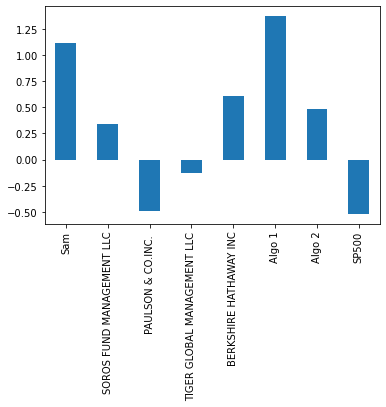

In [177]:
# Visualize the sharpe ratios as a bar plot
total_ann_sharpe_ratio.plot.bar()

### How does your portfolio do?

My portfolio is the 2nd best performing portfolio with respect to its volatility.